In [25]:
import mglearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cancer=load_breast_cancer()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

In [8]:
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [10]:
print("Training Data Accuracy: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Test Data Accuracy: {:.3f}".format(gbrt.score(X_test,y_test)))

Training Data Accuracy: 1.000
Test Data Accuracy: 0.958


In [11]:
# reduce overfitting by limiting tree depth
gbrt_shallow=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt_shallow.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [12]:
print("Training Data Accuracy: {:.3f}".format(gbrt_shallow.score(X_train,y_train)))
print("Test Data Accuracy: {:.3f}".format(gbrt_shallow.score(X_test,y_test)))

Training Data Accuracy: 0.995
Test Data Accuracy: 0.965


In [17]:
# reduce overfitting by reducing learning rate
gbrt_lr=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt_lr.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [18]:
print("Training Data Accuracy: {:.3f}".format(gbrt_lr.score(X_train,y_train)))
print("Test Data Accuracy: {:.3f}".format(gbrt_lr.score(X_test,y_test)))

Training Data Accuracy: 0.995
Test Data Accuracy: 0.944


In [27]:
# plot feature importance:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(12,8))
    n_features=cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Featue")
    plt.ylim(-1,n_features)

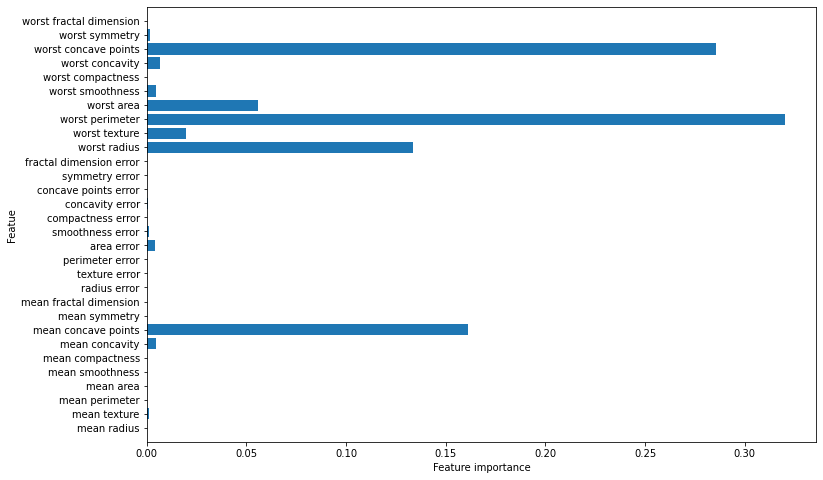

In [28]:
plot_feature_importances_cancer(gbrt_shallow)